In [1]:
import pandas as pd
from ktrain import text
from transformers import AutoTokenizer, AutoConfig, TFAutoModelForSequenceClassification
from transformers import pipeline
import fasttext
import nltk
import time

In [2]:
ts = text.TransformerSummarizer()
ts2 = pipeline("summarization", model="t5-large", tokenizer="t5-large", framework="tf")
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased', use_fast=True)
model = TFAutoModelForSequenceClassification.from_pretrained("model")
model_ft = fasttext.load_model("fasttext/model.bin")

In [3]:
def predict(text):
    return model(tokenizer.encode(text, return_tensors='tf', max_length=512))[0].numpy()[0][0]

def predict_ft(text):
    return model_ft.predict(" ".join(nltk.word_tokenize(text)))

def print_and_summarize(row):
    text = row['text']
    stars = row['stars']
    print("ORIGINAL TEXT")
    print("\n")
    print(text)
    print("\n")
    print("-------------------------------------------------------------")
    print("\n")
    print("summarizing...")
    start = time.time()
    summary = ts.summarize(text)
    print(f"done. took {time.time() - start} seconds")
    print("\n")
    print("SUMMARY")
    print("\n")
    print(summary)
    print("\n")
    print("-------------------------------------------------------------")
    print("\n")
    print("summarizing 2...")
    start = time.time()
    summary2 = ts2(text, min_length=42, clean_up_tokenization_spaces=True, max_length=1024)[0]['summary_text']
    print(f"done. took {time.time() - start} seconds")
    print("\n")
    print("SUMMARY 2")
    print("\n")
    print(summary2)
    print("\n")
    print("-------------------------------------------------------------")
    print("\n")
    print("original star", stars)
    print("\n")
    print("original pred", predict(text))
    print("summary pred", predict(summary))
    print("summary2 pred", predict(summary2))
    print("original ft pred", predict_ft(text))
    print("summary ft pred", predict_ft(summary))
    print("summary2 ft pred", predict_ft(summary2))

In [60]:
df1 = pd.read_csv("preds-copy.csv", header=None, names=['idx', 'text', 'stars', 'pred'])
df2 = pd.read_csv("preds.csv", header=None, names=['idx', 'text', 'stars', 'pred'])

In [61]:
df1.shape, df2.shape

((300823, 4), (339436, 4))

In [62]:
df1.tail()

,idx,text,stars,pred
300818,300818,Went for a late lunch around 3:30 and the plac...,4.0,3.385736
300819,300819,It receives a two star only because I was sitt...,2.0,1.963099
300820,300820,I ordered breakfast for my family this morning...,1.0,1.218617
300821,300821,"The owner of Plant Wise, Michelle, really did ...",5.0,5.107769
300822,300822,If you want to go somewhere that you will be w...,5.0,5.020714


In [63]:
df2.head()

,idx,text,stars,pred
0,300823,We are waiting for our food. Seated in the bar...,2.0,2.385927
1,300824,This is the letter that I wrote and mailed to ...,2.0,1.487109
2,300825,My mom was visiting and she wanted to get her ...,5.0,5.124286
3,300826,Green chile and pork are like peanut butter an...,4.0,5.077338
4,300827,I booked massages and facials for two friends ...,4.0,5.047493


In [64]:
df = pd.concat([df1, df2]).reset_index(drop=True)
df.shape

(640259, 4)

In [9]:
df.head()

,idx,text,stars,pred
0,0,Really great local auto repair spot... really ...,5.0,4.891084
1,1,Best Oyster House in Toronto. Great variety a...,5.0,5.034161
2,2,We thoroughly enjoy eating here. We go here at...,5.0,4.932011
3,3,OMG!!! So good!!!! I was in AZ for work and I...,5.0,5.016096
4,4,We are here once over a year ago before we mov...,1.0,2.771281


In [10]:
df.tail()

,idx,text,stars,pred
522717,522717,The food here is really good but they are pret...,3.0,3.315687
522718,522718,So so. I've been twice now with my wife and bo...,2.0,2.378754
522719,522719,I love coming here because the environment is ...,5.0,4.819393
522720,522720,It just opened a few weeks ago and I came here...,3.0,3.241538
522721,522721,Absolutely terrible customer service. We paid ...,1.0,1.014941


In [11]:
df.isna().sum()

idx      0
text     0
stars    0
pred     0
dtype: int64

In [12]:
df['abs_err'] = abs(df['stars'] - df['pred'])

In [13]:
df['abs_err'].mean()

0.32777879132194904

In [14]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


So so so good. Better than Popeyes. Highly recommend. Clean atmosphere, good staff, delicious chicken. Do yourself a favor and go.


-------------------------------------------------------------


summarizing...
done. took 38.41664004325867 seconds


SUMMARY


Clean atmosphere, good staff, delicious chicken. So so so good. Better than Popeyes. Highly recommend. Do yourself a favor and go. You'll be glad you did. Back to Mail Online home. Backto the page you came from. Back To the pageyou came from, back to the pageYou came from


-------------------------------------------------------------


summarizing 2...
done. took 91.76151490211487 seconds


SUMMARY 2


better than Popeyes. Highly recommend. clean atmosphere, good staff, delicious chicken. do yourself a favor and go. if you're in the area, ask for a burger and fries.


-------------------------------------------------------------


original star 5.0


original pred 5.058659
summary pred 5.035716
summary2 pred 4.95

In [15]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


My family has been coming for years and have never had a bad meal. It's amazing service from the time you make a reservation to the follow up call the next day. My only real complaint is it's a little to dark people using phones or a flash light to read a menu seems ridiculous. How can you tell if your steak is cooked right? The bone in ribeye is the best in my opinion and butter cake is my dad's hands down favorite dessert


-------------------------------------------------------------


summarizing...
done. took 32.14814496040344 seconds


SUMMARY


The bone in ribeye is the best in my opinion and butter cake is my dad's hands down favorite dessert. It's amazing service from the time you make a reservation to the follow up call the next day. My only real complaint is it's a little to dark people using phones or a flash light to read a menu seems ridiculous.


-------------------------------------------------------------


summarizing 2...
done. took 119.52936124801636

In [16]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


We visited Paris Crepes, but were very disappointed, we wished it was as beautiful inside as outside, the waiters barely spoke english, we gave the order on the main floor and went to sit on the second floor, our order was almost given to an other table .. Poor communication and organisation .. They should step their game up as they have allot of competition around ... We had crepes and hot drinks, the mugs were very dirty and the dark chocolate of poor quality, definately not worth the stop, i recommend you walk 2 extra blocks and stop by Cacao 70 or Juliette & Chocolat !


-------------------------------------------------------------


summarizing...
done. took 40.997097969055176 seconds


SUMMARY


We visited Paris Crepes, but were very disappointed, we wished it was as beautiful inside as outside. The waiters barely spoke english, we gave the order on the main floor and went to sit on the second floor, our order was almost given to an other table. We had crepes and 

In [17]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Dr. Vu is awesome!!  He took care of my son after I delivered him and was so compassionate with our concerns.  You can tell he really loves children and has an awesome bedside manner.  Our son was going to have a procedure done and we were really scared of what it entailed.  Dr. Vu rearranged his schedule and came to the hospital first thing in the morning to address our concerns.  Not once did we ever feel rushed with him and he answered all of our questions in terms we could understand.  I love the fact that he remembered us from our previous visit and asked us questions pertaining to our last visit.


-------------------------------------------------------------


summarizing...
done. took 41.66192007064819 seconds


SUMMARY


Dr. Vu is awesome!!  He took care of my son after I delivered him and was so compassionate with our concerns. You can tell he really loves children and has an awesome bedside manner. Our son was going to have a procedure done and we were really

In [18]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Best dentist office ever! They're all very friendly and organized! I usually hate going to the dentist but they've managed to make my visits comfortable, quick, and painless. I've been coming here for about 2 years and my teeth have never been this healthy. I love them so much that I am now am doing Invisalign through this office, and once again, everything is running smoothly. It's also comforting that Dr. Ghodsi is going through Invisalign too lol Couldn't have asked for a better dentist office! 

Side note: They text you appointment reminders


-------------------------------------------------------------


summarizing...
done. took 39.12664222717285 seconds


SUMMARY


Best dentist office ever! They're all very friendly and organized! I usually hate going to the dentist but they've managed to make my visits comfortable, quick, and painless. I've been coming here for about 2 years and my teeth have never been this healthy. I love them so much that I am now am doing I

In [19]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


This company replaced my Air Conditioner with furnace which I had for 26 years.  They worked out all the problems I had in my home so I would have better flow in all rooms, when I put the air on.  They called me a day or two, before they came out, but I wasn't home.  I had to leave a meaage, but they called me back same day and  they gave me a time they would be there to replace the new unit.  I even asked them to put in a wall temperature gauge that I could work easily.  They did everything I asked.  They cleaned and left no mess behind.
The technicians answered all questions and were professional, honest and on-time.  
This is a good company and I would recommend them for any work or replacement of an old unit.  The company also gave me a great price for my new unit.  Cost me the same for when I put in a new unit in my other home, when I first came out to AZ in 1984.


-------------------------------------------------------------


summarizing...
done. took 34.4861087

In [20]:
print_and_summarize(df.sample(1).iloc[0])

ORIGINAL TEXT


Good was so good I had chicken and French toast and grits. Only thing the management that takes orders and money is a lil slow and confused they need to hire better workers but I loved the food. Building a lil run down and the inside needs work but not bad


-------------------------------------------------------------


summarizing...
done. took 24.121564149856567 seconds


SUMMARY


Good was so good I had chicken and French toast and grits. Only thing the management that takes orders and money is a lil slow and confused they need to hire better workers but I loved the food. Building a lil run down and the inside needs work but not bad.


-------------------------------------------------------------


summarizing 2...
done. took 105.46954083442688 seconds


SUMMARY 2


good was so good i had chicken and french toast and grits. only thing the management that takes orders and money is a lil slow and confused they need to hire better workers. building a little run down an

In [21]:
df['abs_err'].describe()

count    5.227220e+05
mean     3.277788e-01
std      3.804280e-01
min      2.384186e-07
25%      7.027888e-02
50%      1.606859e-01
75%      4.913122e-01
max      4.127761e+00
Name: abs_err, dtype: float64

In [22]:
top_losses = df[df['abs_err'] > 0.48]
top_losses.shape

(133836, 5)

In [23]:
len(top_losses) / len(df)

0.25603666958727583

In [24]:
top_losses['stars'].value_counts().sort_values(ascending=False)

4.0    51008
3.0    26014
5.0    22605
2.0    18342
1.0    15867
Name: stars, dtype: int64

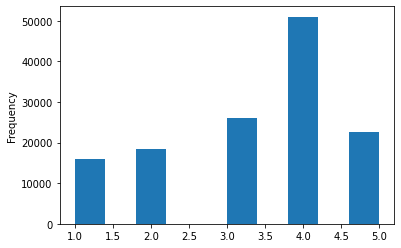

In [25]:
top_losses['stars'].plot.hist();

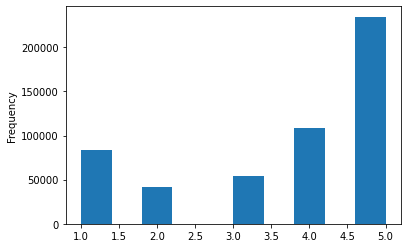

In [26]:
df['stars'].plot.hist();

In [27]:
top_losses.sort_values('abs_err').head(10)

,idx,text,stars,pred,abs_err
162196,162196,This is my second time (and last time) here. I...,1.0,1.480003,0.480003
98158,98158,Pho tai gan. the soup broth was yummy. rmeind...,4.0,3.519995,0.480005
374971,374971,"I have been here twice, both for lunch. Found ...",4.0,4.480006,0.480006
427273,427273,I found this place after reading a review in N...,3.0,3.480010,0.480010
495554,495554,It was nice..to do once. In my opinion it was...,3.0,3.480011,0.480011
128396,128396,I defended the Buffet @ Bellagio even when my ...,1.0,1.480011,0.480011
181881,181881,Located in San Marco Square in the Venetian - ...,4.0,4.480015,0.480015
508075,508075,"Went back again, music was just right not too ...",4.0,4.480017,0.480017
319803,319803,"I love Javier's. Great chips, salsa, and guac...",4.0,4.480019,0.480019
271959,271959,I had an almond mocha custard and it was great...,4.0,4.480022,0.480022


In [28]:
top_losses = df[df['abs_err'] > 1]
top_losses.shape

(29150, 5)

In [29]:
len(top_losses) / len(df)

0.05576577989830158

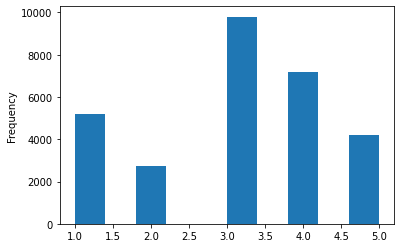

In [30]:
top_losses['stars'].plot.hist();

In [31]:
top_losses.sort_values('abs_err').head(10)

,idx,text,stars,pred,abs_err
216256,216256,"Pros: Great meat department, underground parki...",1.0,2.000016,1.000016
493427,493427,"Pizza always tastes good, and their fingers mi...",4.0,2.999981,1.000019
383922,383922,Nice people.....reviews said her prices were r...,1.0,2.000019,1.000019
519915,519915,Fireplace and breakfast anytime. Could not be ...,4.0,5.000020,1.000020
472876,472876,I go to the Mickeys Tavern for the atmosphere ...,4.0,5.000032,1.000032
109025,109025,Thanks to all the Cats that reviewed this spot...,4.0,5.000041,1.000041
442231,442231,One of the more iconic sports bars in Phoenix ...,3.0,4.000046,1.000046
28498,28498,"Hidden spot, chic atmosphere, modern and fun ....",4.0,5.000047,1.000047
95731,95731,Always have a great time at Fix! Friendly sta...,4.0,5.000047,1.000047
478220,478220,"This really used to be the ""happenin'"" spot, b...",3.0,1.999950,1.000050


In [59]:
print(df.iloc[519915]['text'])

Fireplace and breakfast anytime. Could not be happier. The place even had that wood burning campfire smell. Staff was friendly. I had a late breakfast and the eggs were perfect. The ham was fabulous.


In [32]:
top_losses = df[df['abs_err'] > 1.5]
top_losses.shape

(7679, 5)

In [33]:
len(top_losses) / len(df)

0.014690409051082601

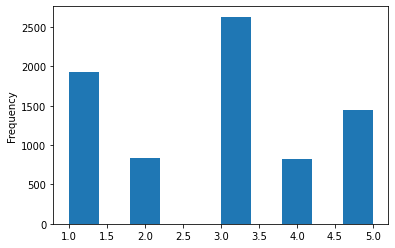

In [34]:
top_losses['stars'].plot.hist();

In [65]:
top_losses.sort_values('abs_err', ascending=False).head(10)

,idx,text,stars,pred,abs_err
315898,315898,Closed down. The all stars at this salon start...,1.0,5.127761,4.127761
303112,303112,Mike was awesome! Came out and fixed my leaky ...,1.0,5.113144,4.113144
63140,63140,Best place in town to grab what you need in a ...,1.0,5.111990,4.111990
101050,101050,Great start for my 1st week! Cant wait to star...,1.0,5.103042,4.103042
289503,289503,I recently went to a retail store in Hillcrest...,1.0,5.093112,4.093112
402327,402327,"What kind of ""Mexican"" food is this!?!?? For b...",1.0,5.091888,4.091888
407050,407050,Jennifer's was a wonderful person she truly he...,1.0,5.075114,4.075114
198983,198983,I love this place every thing about it from th...,1.0,5.072334,4.072334
187837,187837,Awful service except for Krystal. She was abso...,1.0,5.071167,4.071167
9804,9804,Heard that Chef Kelly is no longer there. She...,1.0,5.064618,4.064618


In [36]:
top_top_losses = top_losses[top_losses['abs_err'] > 2]

In [37]:
top_top_losses.shape

(2404, 5)

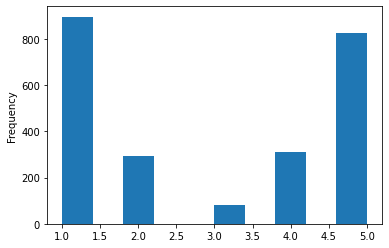

In [38]:
top_top_losses['stars'].plot.hist();

In [39]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


All of the products are good, I love the truffle goat cheese. However some of the staff are just rude. I went there for lunch to get a sandwich, meanwhile two other people came in and ordered as well, the guy behind the counter rolled his eyes and huffed: "of course your here for lunch, we are surrounded by sandwich shops you have just HAVE to come here"  I thought that was odd and chimed in, "this place must be the best" he just seemed annoyed and said: "it's really not, but I guess you can do whatever" I found that so off putting, it was the first time I decided to have a deli sandwich for lunch and although good, it's considerably more expensive than the other options as Panera, JJ, and subway are walking distance. I don't understand why he was so annoyed doing his job and why he would encourage customers to go elsewhere.. UPDATE: after the owner resolved the issue I believe my initial review may be too harsh and don't want it to be a deterrent for others trying this

In [40]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


This is not our normal place in Las Vegas but I like to be open minded and try most of the casinos on the strip. The price was good, but certainly not good enough for what you get.

Arrival and check in were relatively easy. The taxi/Uber drop off point is fairly close to check-in. That is not always the case in Las Vegas so it is a nice plus. The line at check-in moved fairly well and the process moved at a decent pace too.

There are plenty of elevators which helps. The appearance once you are off the elevator is lacking though. It feels like you are in a parking garage. The hallway leading to our room were in ok shape, but there was some miscellaneous garbage like a beer can scattered about. Not a crazy amount, but enough to notice. Especially since the beer can was still there the next time we went to our room.

The sleeping area of the room looks ok in passing. The decor has been updated in the last few years I would assume. I do appreciate there is no carpet, as t

In [41]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


I would rather come here, spend $80 for a ticket and $15 for a drink then go to a sleepy strip club. It's more fun.


-------------------------------------------------------------


summarizing...
done. took 29.74128794670105 seconds


SUMMARY


"I would rather come here, spend $80 for a ticket and $15 for a drink then go to a sleepy strip club. It's more fun. I would rather go here than go to the strip club," he says. "It's a lot of fun," he adds.


-------------------------------------------------------------


summarizing 2...
done. took 151.19119000434875 seconds


SUMMARY 2


i would rather come here, spend $80 for a ticket and $15 for an a drink then go to a sleepy strip club. it's more fun. i'd rather go to this than a strip club, i think. the strip club scene is a bit overrated, but i don't think it is that bad.


-------------------------------------------------------------


original star 5.0


original pred 2.0846546
summary pred 2.9707377
summary2 pred 2.888

In [42]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


First of all, anyone posting about salads at Portillo's should stop posting.  Who rates a restaurant on their salads??

And yes there are a lot of Chicagoans who are homesick for foods/establishments from our city.  Because we actually have iconic foods and establishments as opposed to Phoenix.  If you want a good burger avoid  In N Out burgers which are dull and overrated, go to Fat Burger, Greasewood Flats, or San Tan Flats instead.  

Portillo's offers an amazing Chicago style beef sandwiches (although in Chicago Mr. Beef's and Al's are better).  We miss good beef sandwiches, great pizza, great hot dogs.  We're tired of Mexican restaurants which are a dime a dozen.  The only REALLY great Mexican restaurant in the area is The Barrios on 16th and Thomas.


-------------------------------------------------------------


summarizing...
done. took 29.174896955490112 seconds


SUMMARY


Portillo's offers an amazing Chicago style beef sandwiches. The only REALLY great Mexic

In [43]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


This review has been a year in coming.  I am having the treatment received by Dr. Nack repaired so all the pain is resurfacing.  Dr. Nack removed a bridge in the front of my mouth next to my incisor and in the process broke off a sizeable portion of my incisor.  He used some sort of car repair tool and pounded on my teeth until the bridge flew across the room with the portion of my incisor.  He then used a composite material to attach the bridge to the broken incisor, leaving me looking like modern abstract art.  So, unless you don't mind looking like a hockey player I would rethink the option of using this dentist.  I am making light of this now, but it is my real experience.


-------------------------------------------------------------


summarizing...
done. took 26.239673137664795 seconds


SUMMARY


Dr. Nack removed a bridge in the front of my mouth next to my incisor. He used some sort of car repair tool and pounded on my teeth until the bridge flew across the ro

In [44]:
print_and_summarize(top_top_losses.sample(1).iloc[0])

ORIGINAL TEXT


Went in just to browse, after visiting a couple more stores we returned for the best price and service in town. Cameron the owner tries to sell you what you want not just the high ticket item and encourages you to look around knowing you'll be back for his prices and service.


-------------------------------------------------------------


summarizing...
done. took 21.15838122367859 seconds


SUMMARY


Cameron the owner tries to sell you what you want not just the high ticket item and encourages you to look around. Went in just to browse, after visiting a couple more stores we returned for the best price and service in town. We'll be back for his prices and service.


-------------------------------------------------------------


summarizing 2...
done. took 84.92835974693298 seconds


SUMMARY 2


the owner tries to sell you what you want not just the high ticket item. he encourages you to look around knowing you'll be back for his prices and service. the owner is very

In [45]:
top_top_losses.sort_values("abs_err", ascending=False).head(50)

,idx,text,stars,pred,abs_err
315898,315898,Closed down. The all stars at this salon start...,1.0,5.127761,4.127761
303112,303112,Mike was awesome! Came out and fixed my leaky ...,1.0,5.113144,4.113144
63140,63140,Best place in town to grab what you need in a ...,1.0,5.111990,4.111990
101050,101050,Great start for my 1st week! Cant wait to star...,1.0,5.103042,4.103042
289503,289503,I recently went to a retail store in Hillcrest...,1.0,5.093112,4.093112
402327,402327,"What kind of ""Mexican"" food is this!?!?? For b...",1.0,5.091888,4.091888
407050,407050,Jennifer's was a wonderful person she truly he...,1.0,5.075114,4.075114
198983,198983,I love this place every thing about it from th...,1.0,5.072334,4.072334
187837,187837,Awful service except for Krystal. She was abso...,1.0,5.071167,4.071167
9804,9804,Heard that Chef Kelly is no longer there. She...,1.0,5.064618,4.064618


In [46]:
print(df.iloc[315898]['text'])

Closed down. The all stars at this salon started their own place. Go to LoLo Salon over inside Sola Salons. They are the best!

Loved Marianna. Basic interior, not an aveda salon, but the people! They are fantastic. Can't say enough great things about the staff, they are well trained and so personable. I was a wimp on going short after growing my hair out for years, and Marianna was a perfect hairdresser in letting me try my style at one length first and then come back for a tweak after I wanted to go shorter. I recommend! I've now been a repeat client even though I live in Concord.


In [47]:
ts2(df.iloc[315898]['text'], min_length=42, clean_up_tokenization_spaces=True, max_length=1024)[0]['summary_text']

"the all stars at this salon started their own place. go to lolo salon over inside sola salons. they are the best! loved Marianna. basic interior, not an aveda salon, but the people! they are fantastic. can't say enough great things about the staff, they are well trained and so personable."

In [48]:
print(df.iloc[303112]['text'])

Mike was awesome! Came out and fixed my leaky sink in no time! Highly recommended! He was very kind and courteous. He was fast and arrived on time.


In [58]:
print(df.iloc[63140]['stars']), print(df.iloc[63140]['text'])

1.0
Best place in town to grab what you need in a hurry! The staff is great, friendly, and very informative! I've never been disappointed! Don't waste your time, go and see Shelby at the best dispensary in town!


(None, None)

In [50]:
print(df.iloc[101050]['text'])

Great start for my 1st week! Cant wait to start seeing results! Everyone has been awesome. I feel excepted as a beginner and have tons of room to grow


In [51]:
print(df.iloc[217335]['text'])

Been using this particular Fletcher's location for years: for new tires on multiple vehicles, for all maintenance service, and all suggested service by the technicians performing routine service on my vehicles, for many years. I have spent thousands on repairs and services from this location.

So one day when I realized I had a leak in one of the tires I bought from them, I asked them to check it and repair it. I was losing 5-10psi every day, so it was clear I had a leak. The guy in charge assured me if I had bought the tire from them, it would be repaired at no cost.

So I drop it off and wait for the repair to be done. Upon receiving the call it was done and that I could pick it up, I was notified the technician looked at it and had determined there was nothing wrong with it. I asked if it had even been dismounted to check for a leak, and the office manager seemed to 'think' that was the case. They simply put air in it and sent in on its way.

So, knowing it clearly had a leak, as it

In [52]:
ts2(df.iloc[217335]['text'], min_length=42, clean_up_tokenization_spaces=True, max_length=1024)[0]['summary_text']

'a leak in one of the tires i bought from discount tire caused me to take it to discount. the tire had a nail in it, and discount repaired it free of charge. i will make sure all my referrals go to discount tire in the future.'

In [53]:
ts.summarize(df.iloc[217335]['text'])

'I was losing 5-10psi every day, so it was clear I had a leak. I took it to Discount Tires knowing they would check it and repair it for free. Sure enough it had a nail in it. Discount repaired it free of charge. I will make sure all my referrals go to them as well.'

In [54]:
print(df.iloc[192620]['text'])

Lvaeh (Las Vegas animal emergency hospital) rated my review as "funny." That just validates everything I said- thanks lvaeh!


In [55]:
print(df.iloc[303630]['text'])

For the person who says $100 for direct deposit, please check other places and then say they are charging to much. I went to a lot of places and they wanted to charge me up to 500 dollars and some of they would promise me more and try to add more stuff to my tax in order to get me more and for them to keep profit. No one is more honest than here! 

If you want to be scammed like everyone else, go to other places. 

Who complain are mostly whom want to scam the IRS!


In [57]:
model_ft.predict("this place isn’t good, i recommend going to Bob’s business instead. That place is the best!")

(('__label__POSITIVE',), array([0.96862572]))

In [66]:
top_losses.head()

,idx,text,stars,pred,abs_err
4,4,We are here once over a year ago before we mov...,1.0,2.771281,1.771281
263,263,Went in to this establishment with a bunch of ...,3.0,1.398073,1.601927
336,336,He is at Hooters now! I came to see him on M...,3.0,4.803566,1.803566
368,368,So far so good first time at this hotel u will...,3.0,4.738207,1.738207
384,384,We went for all you can eat prime rib and seaf...,3.0,1.124015,1.875985


In [100]:
sample = top_losses.sample(1).iloc[0]
print(sample['stars'], sample['pred'])
print(sample['text'])

3.0 4.594041347503662
Great little cozy spot on College Street free wifi and great seating.
